In [1]:
# Step 1: Load & Inspect Dataset

import pandas as pd

# Load the dataset
df = pd.read_csv('/Users/maazhussain/Desktop/Projects/Banking Churn Risk & Product Strategy/churn.csv')

# Show structure and first rows
print("Shape:", df.shape)
df.info()
df.head()


Shape: (10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Step 2: Clean & Prepare

# Drop non-essential columns
df_clean = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Check the cleaned dataset
print("Cleaned shape:", df_clean.shape)
df_clean.head()


Cleaned shape: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


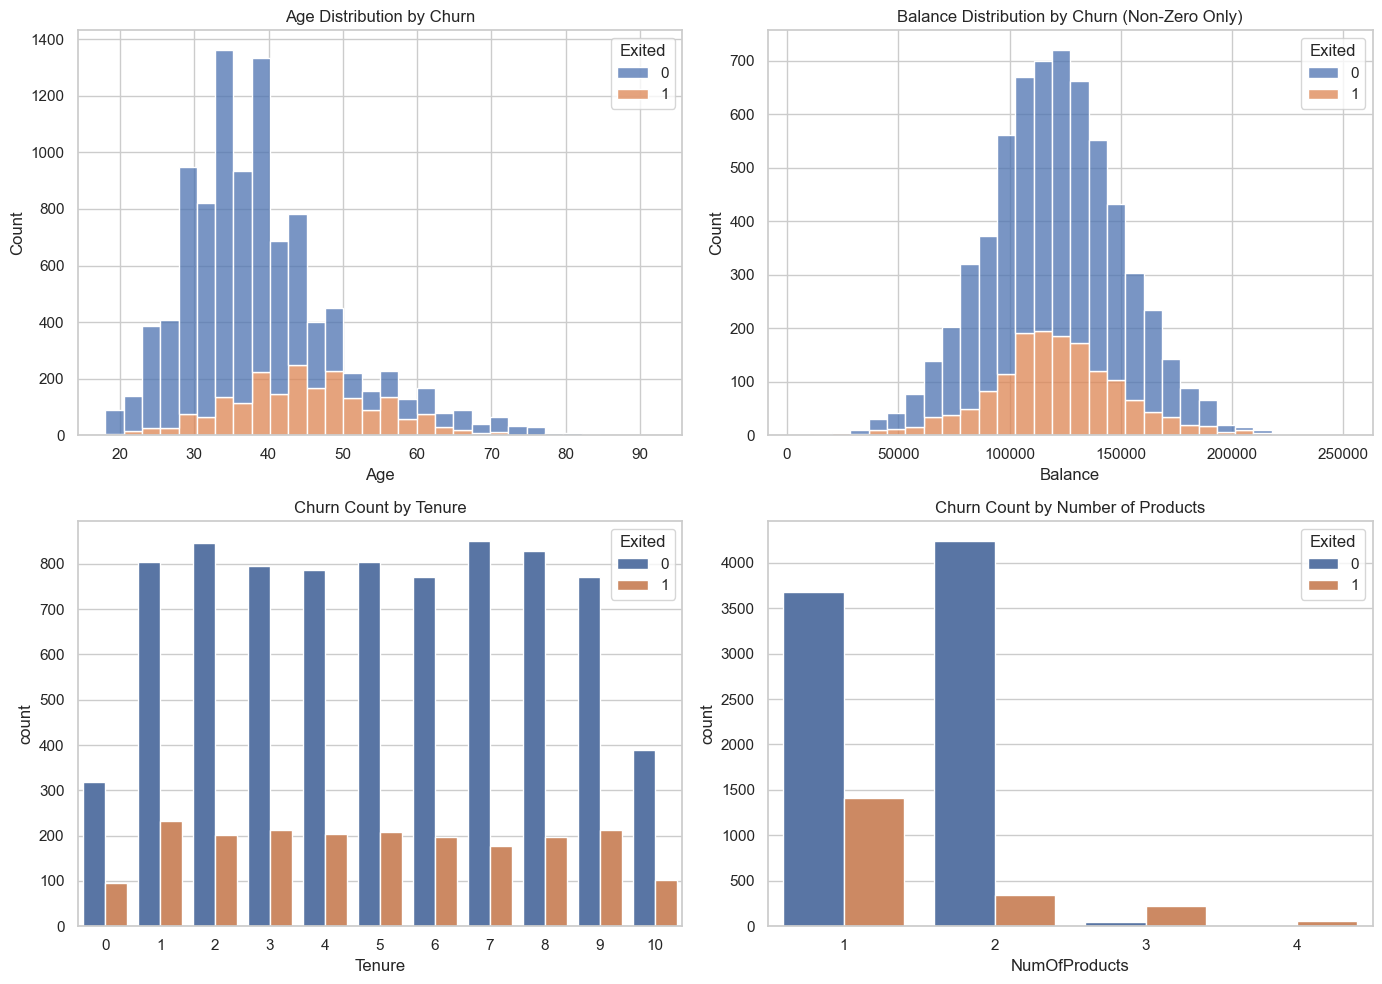

In [5]:
# Step 3: EDA – Visualize churn vs key features

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Age vs Churn
sns.histplot(data=df_clean, x="Age", hue="Exited", multiple="stack", bins=30, ax=axes[0, 0])
axes[0, 0].set_title("Age Distribution by Churn")

# 2. Balance vs Churn (exclude zero balances)
sns.histplot(data=df_clean[df_clean["Balance"] > 0], x="Balance", hue="Exited", multiple="stack", bins=30, ax=axes[0, 1])
axes[0, 1].set_title("Balance Distribution by Churn (Non-Zero Only)")

# 3. Tenure vs Churn
sns.countplot(data=df_clean, x="Tenure", hue="Exited", ax=axes[1, 0])
axes[1, 0].set_title("Churn Count by Tenure")

# 4. Num of Products vs Churn
sns.countplot(data=df_clean, x="NumOfProducts", hue="Exited", ax=axes[1, 1])
axes[1, 1].set_title("Churn Count by Number of Products")

plt.tight_layout()
plt.show()


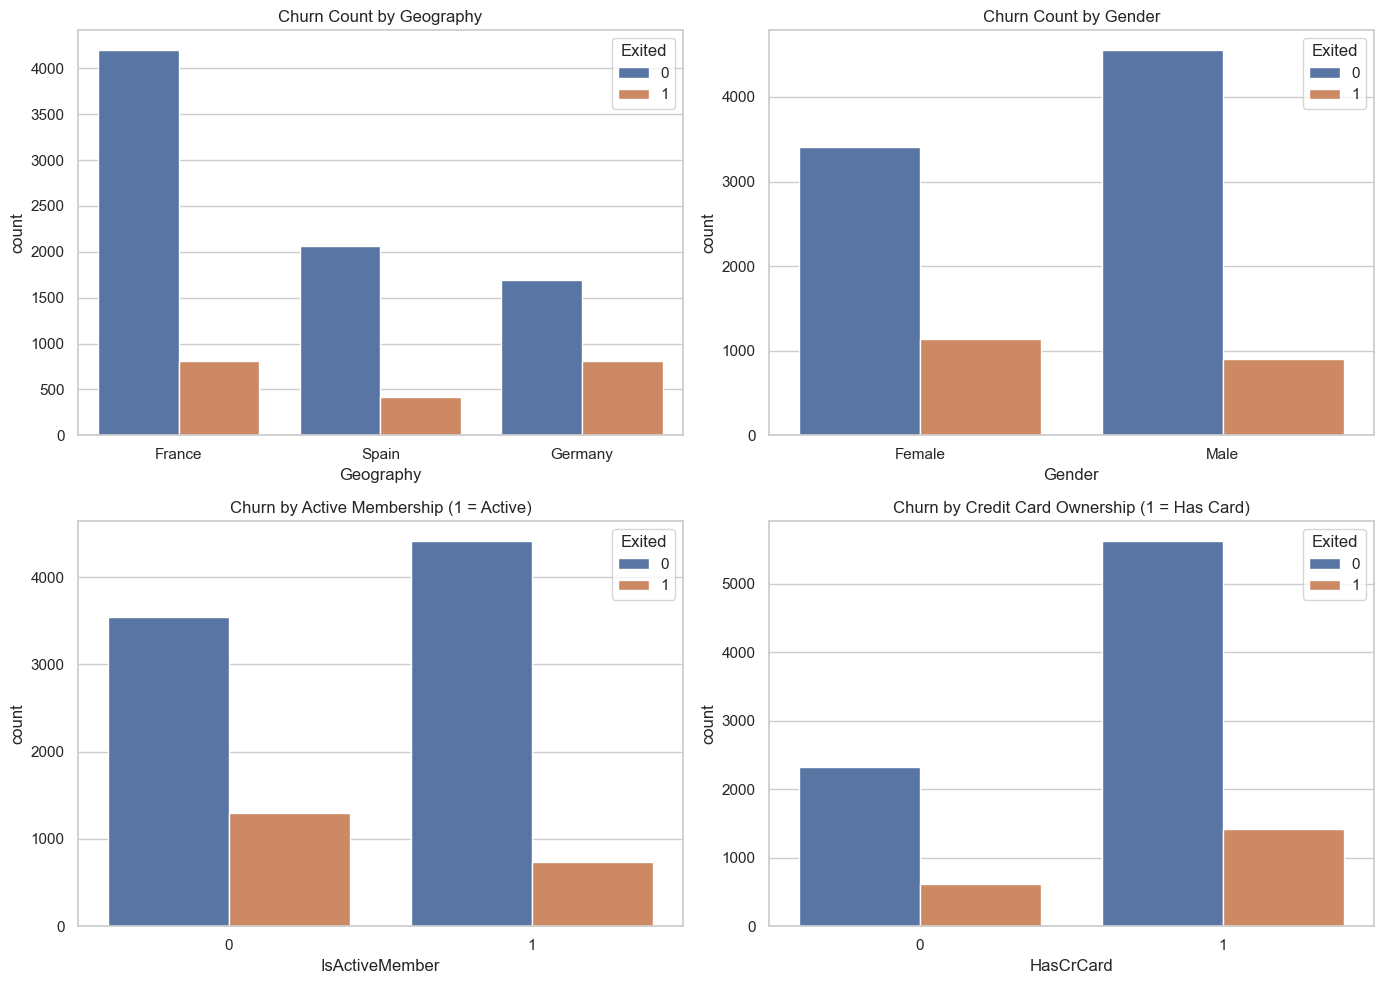

In [7]:
# Step 4: Churn Breakdown by Categorical Features

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Geography vs Churn
sns.countplot(data=df_clean, x="Geography", hue="Exited", ax=axes[0, 0])
axes[0, 0].set_title("Churn Count by Geography")

# 2. Gender vs Churn
sns.countplot(data=df_clean, x="Gender", hue="Exited", ax=axes[0, 1])
axes[0, 1].set_title("Churn Count by Gender")

# 3. IsActiveMember vs Churn
sns.countplot(data=df_clean, x="IsActiveMember", hue="Exited", ax=axes[1, 0])
axes[1, 0].set_title("Churn by Active Membership (1 = Active)")

# 4. HasCrCard vs Churn
sns.countplot(data=df_clean, x="HasCrCard", hue="Exited", ax=axes[1, 1])
axes[1, 1].set_title("Churn by Credit Card Ownership (1 = Has Card)")

plt.tight_layout()
plt.show()


In [9]:
# Step 5.1: Prepare data for modeling

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy the clean dataframe
model_df = df_clean.copy()

# Encode categorical columns: Geography and Gender
model_df["Geography"] = LabelEncoder().fit_transform(model_df["Geography"])
model_df["Gender"] = LabelEncoder().fit_transform(model_df["Gender"])

# Define features and target
X = model_df.drop("Exited", axis=1)
y = model_df["Exited"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape


((8000, 10), (2000, 10))

In [11]:
# Step 5.2: Train & Evaluate Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



 Accuracy: 0.8165

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.61      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.77      2000


 Confusion Matrix:
 [[1561   46]
 [ 321   72]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Step 5.3: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_pred = rf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(" Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("\n Classification Report:\n", classification_report(y_test, rf_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))


 Random Forest Accuracy: 0.8645

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


 Confusion Matrix:
 [[1545   62]
 [ 209  184]]


**Capstone Report – Banking Churn Risk Analysis**

***Objective***

To analyze customer churn in a European bank and identify key drivers using exploratory data analysis and predictive modeling. The goal is to support data-driven retention strategies.

***Dataset Summary***

Source: Kaggle – Churn for Bank Customers
Rows: 10,000 customers
Target Variable: Exited (1 = churned, 0 = retained)
Key Features: Age, Geography, Tenure, Balance, Products, Credit Card Ownership, Activity

***Key Insights from EDA***


Feature	Churn Trend
Age	Older customers (40+) churn more frequently
Balance	High churn even among high-balance customers
Products	Single-product customers are most likely to churn
Geography	Germany has the highest churn ratio among regions
Activity	Inactive users show significantly higher churn
Credit Card	Non-card holders churn slightly more often

***Model Results***


Model | Accuracy | Churn Recall | Churn Precision | F1 (Churn)
Logistic Regression | 81.7% | 18% | 61% | 28%
Random Forest | 86.5% | 47% | 75% | 58%

***Conclusion:***
Random Forest significantly outperforms logistic regression, capturing more than double the churners. It's recommended for deployment.

***Recommendations***

Focus retention efforts on older, inactive customers with only one product
Target Germany with tailored campaigns
Promote cross-selling to increase product ownership
Build automated churn risk dashboards for real-time decision-making
